In [1]:
import numpy as np
import pandas as pd
#最大表示行数の指定（ここでは50行を指定）
pd.set_option('display.max_rows', 50)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
def plot_confusion_matrix(test_y,pred_y,class_names,normalize=False, fontsize=32):
    cm = confusion_matrix(test_y,pred_y)
    # classes = class_names[unique_labels(test_y,pred_y)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=0)
    
    if len(class_names) <= 3:
        fig, ax = plt.subplots(figsize=(8, 4))
    else:
        fig, ax = plt.subplots(figsize=(16, 8))

    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           ylabel='True label\n',
           xlabel='\nPredicted label')
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,
                    i,
                    format(cm[i, j], fmt),
                    ha="center",
                    va="center",
                    color="red", fontsize=fontsize)
    fig.tight_layout()
    return ax

In [3]:
def rename(kind, hold_position, name):
    folder_name = "pattern2Hips"
    if kind == "test":
        file_path = folder_name + "/" + kind + "_" + name + "分類_pattern2.npy"
        return file_path
    
    if name == "a安部":
        file_path = folder_name + "/" + name + "分類_" + kind + "_" + hold_position + "_pattern2.npy"
#     elif name == "熊野" and kind == "validation":
#         file_path = "pattern" + pattern + "/val_" + hold_position + "_" + name + "分類.npy"
    else:
        file_path = folder_name + "/" + kind + "_" + hold_position + "_" + name + "分類_pattern2.npy"
    return file_path

In [4]:
def pattern2Concat(kind, hold_position, name):
    if kind == "train":
        label = np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1])
        label = np.delete(label, 120845, 0)
        pattern_file = np.array([1] * label.shape[0]).reshape([-1, 1])
    else:
        label = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
        pattern_file = np.load("validation_pattern2.npy")
        print("pattern2.npyのshape", pattern_file.shape)
    
    file_path = rename(kind, hold_position, name)
    
    print(name, np.load(file_path).shape)
    print(np.argmax(np.load(file_path), axis=1), np.argmax(np.load(file_path), axis=1).reshape([-1, 1]).shape)
    predict = np.argmax(np.load(file_path), axis=1).reshape([-1, 1])
    print(name, np.load(file_path))
    if kind == "train" and (name == "安部" or name == "横山"):
        predict = np.delete(predict, 120845, 0)
    
#     if name != "熊野":
    predict += 1

    # ユーザ番号も入れとく
    if kind == "validation":
        user_label = [2] * 14813 + [3] * 13872
        user_label = np.array(user_label).reshape([-1, 1])

        print(pattern_file.shape, label.shape, predict.shape, np.unique(predict))
        result = np.concatenate([pattern_file.reshape([-1, 1]), user_label, label, predict], axis=1).astype(np.int32)
        result = pd.DataFrame(result, columns=["pattern", "user", "label", name + "predict"])
        return result
    else:
        print(pattern_file.shape, label.shape, predict.shape, np.unique(predict))
        result = np.concatenate([pattern_file.reshape([-1, 1]), label, predict], axis=1).astype(np.int32)
        result = pd.DataFrame(result, columns=["pattern", "label", name + "predict"])
        return result

# すべての保持位置の評価データに対する結果を出す

In [5]:
# hold_positions = ["Bag", "Hips", "Torso", "Hand"]
hold_positions = ["Hips"]
names = ["安部", "関口", "熊野", "横山"]
# names = ["安部", "関口", "熊野"]
# names = ["安部", "関口"]
patterns = []

for name in names:
    tmp = pattern2Concat("validation", hold_positions[0], name)
    for hold_position in hold_positions[1:]:
        tmp = pd.concat([tmp, pattern2Concat("validation", hold_position, name)], axis=0)
    print(name, tmp.shape)
    patterns.append(tmp)
    
patterns[0].shape

pattern2.npyのshape (28685,)
安部 (28685, 8)
[1 1 2 ... 1 3 0] (28685, 1)
安部 [[1.7846963e-01 3.9654773e-01 7.4766758e-03 ... 1.8290153e-02
  6.7446932e-02 2.7059248e-01]
 [1.4470996e-02 7.4937654e-01 5.4386478e-02 ... 1.7903972e-02
  9.4554741e-03 1.0182008e-02]
 [5.7388233e-06 1.1095200e-02 9.8505229e-01 ... 1.1100974e-03
  1.4150917e-04 8.6610919e-05]
 ...
 [1.7076168e-02 9.5880806e-01 5.4507791e-03 ... 1.6916898e-03
  6.1089726e-04 4.9404157e-03]
 [1.8971655e-06 6.4540170e-02 8.9177710e-04 ... 4.2694484e-04
  8.3854575e-05 1.5336775e-05]
 [9.5036817e-01 1.2188383e-02 5.9518062e-08 ... 8.4774301e-04
  5.5256963e-04 6.2566556e-05]]
(28685,) (28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
安部 (28685, 4)
pattern2.npyのshape (28685,)
関口 (28685, 8)
[2 2 2 ... 1 1 0] (28685, 1)
関口 [[8.8469431e-02 5.5418324e-02 6.6707796e-01 ... 2.8378738e-02
  2.3905925e-02 3.7955381e-02]
 [1.2590750e-03 2.1177070e-02 9.4868869e-01 ... 1.1598644e-03
  1.5094734e-04 1.5169139e-04]
 [7.0279734e-06 2.2218443e-04 9.9963748

(28685, 4)

安部 0.7861855735675005
関口 0.8830391436035946
熊野 0.23848859273622486
横山 0.5079546133576895


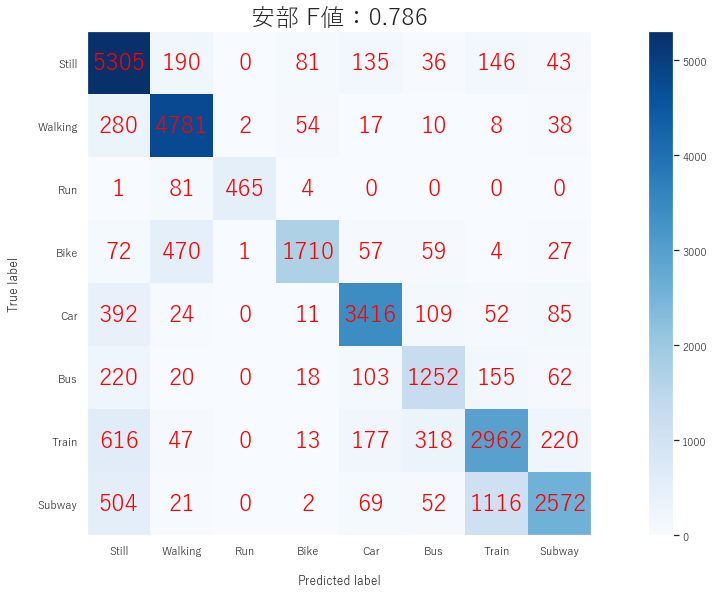

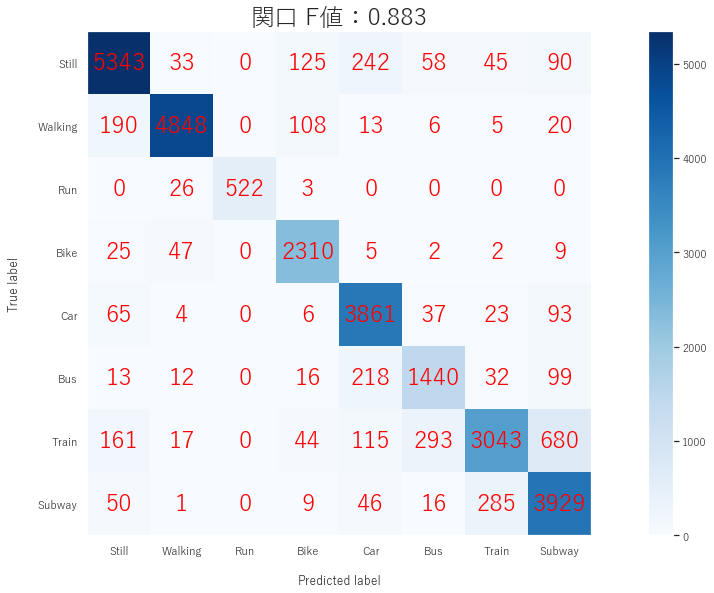

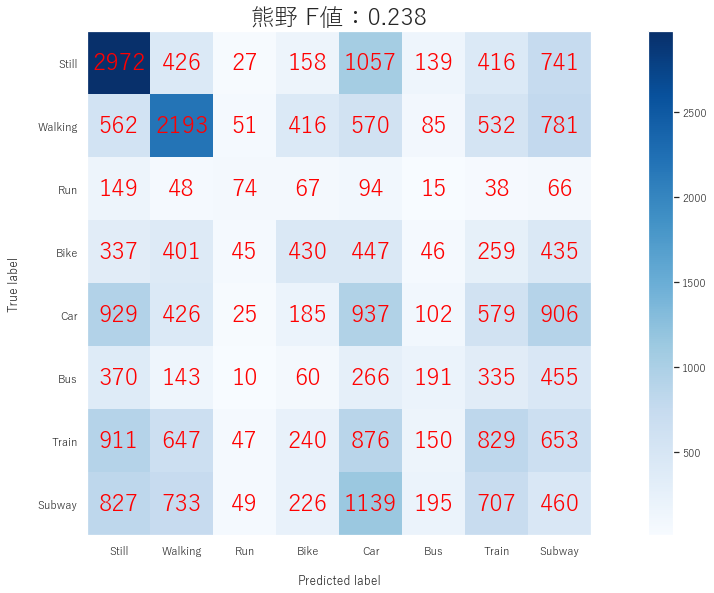

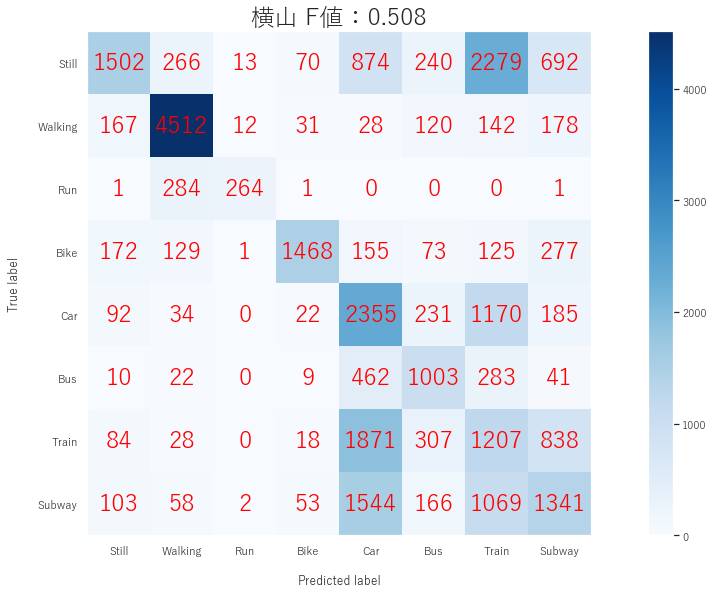

In [6]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

for pattern, name in zip(patterns, names):
    plot_confusion_matrix(pattern['label'], pattern[name + "predict"], class_names, normalize=False, fontsize=24)
    plt.grid(False)

    f1 = f1_score(pattern['label'], pattern[name + "predict"], average="macro")
    plt.title(name + " F値：" + "{0:.3f}".format(f1), fontsize=24)
    print(name, f1)

安部 0.7211643803272717
関口 0.739315794682591
熊野 0.210439538103652
横山 0.4774221895719392


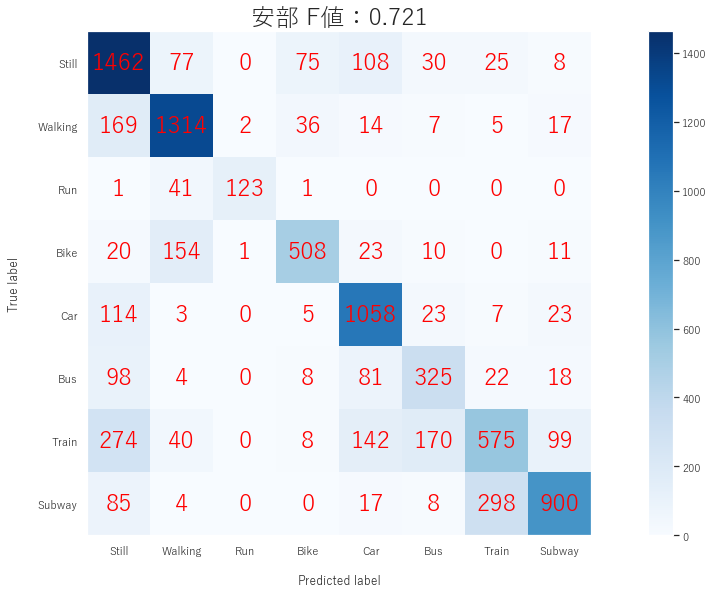

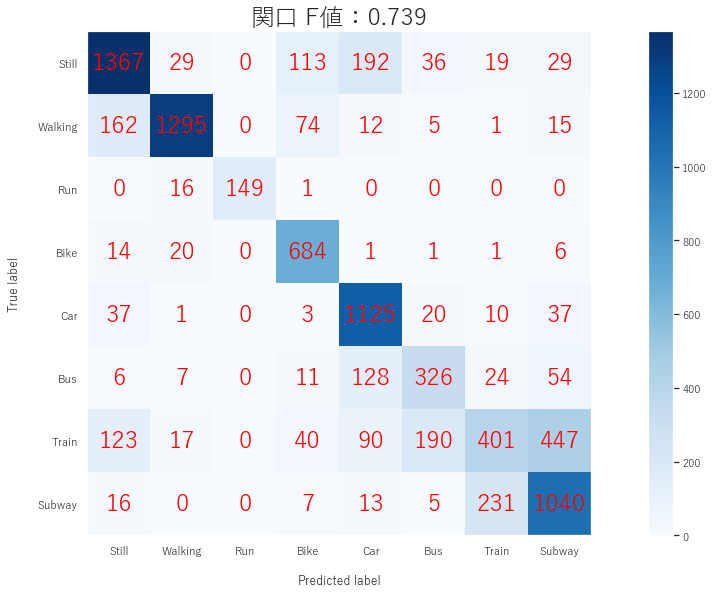

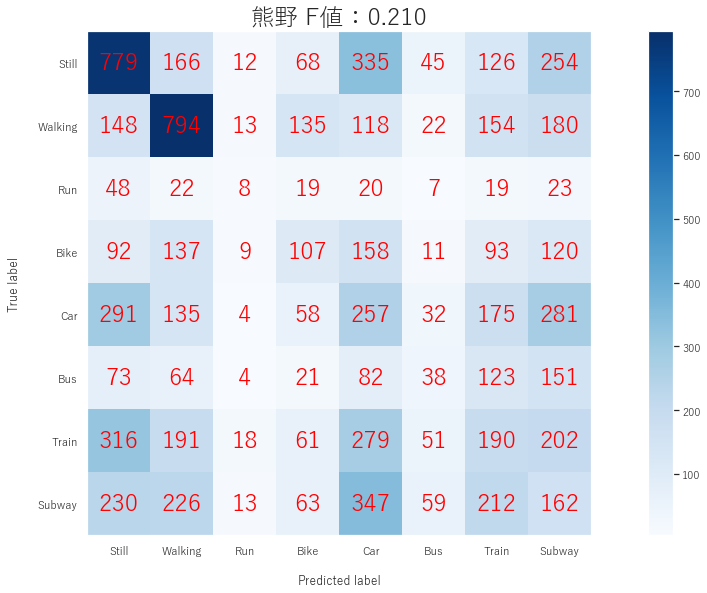

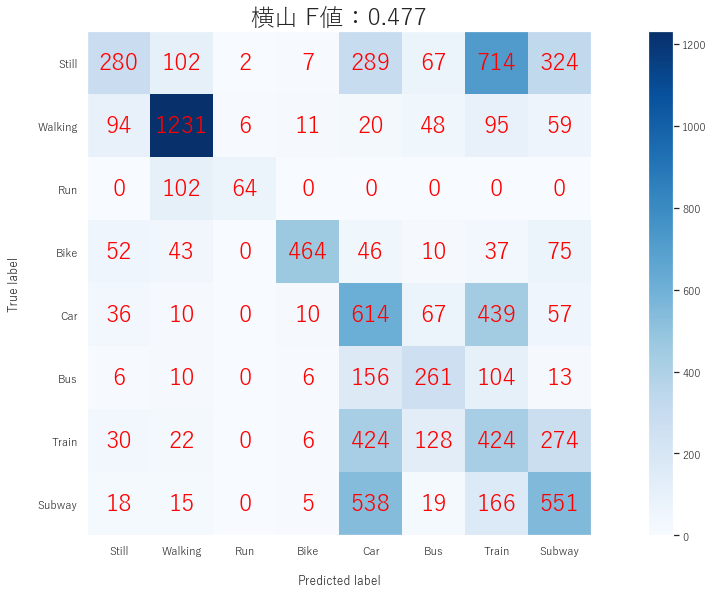

In [7]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

for pattern, name in zip(patterns, names):
    plot_confusion_matrix(pattern[pattern['pattern'] == 2]['label'], pattern[pattern['pattern'] == 2][name + "predict"], class_names, normalize=False, fontsize=24)
    plt.grid(False)

    f1 = f1_score(pattern[pattern['pattern'] == 2]['label'], pattern[pattern['pattern'] == 2][name + "predict"], average="macro")
    plt.title(name + " F値：" + "{0:.3f}".format(f1), fontsize=24)
    print(name, f1)

# ユーザごとに混同行列

安部 0.7112439496031249
関口 0.6740684664400942
熊野 0.22307809222628633
横山 0.5798593043156355
安部 0.707997292376785
関口 0.7757063585548651
熊野 0.1881684858309993
横山 0.2861314989291042


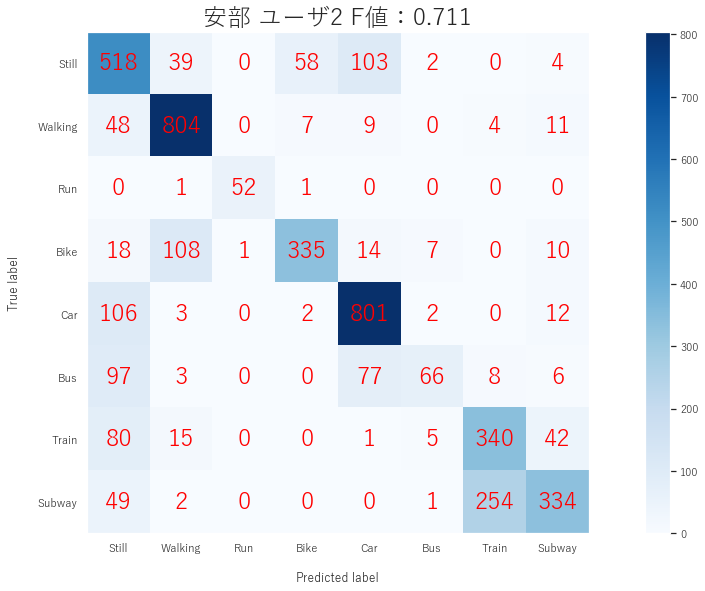

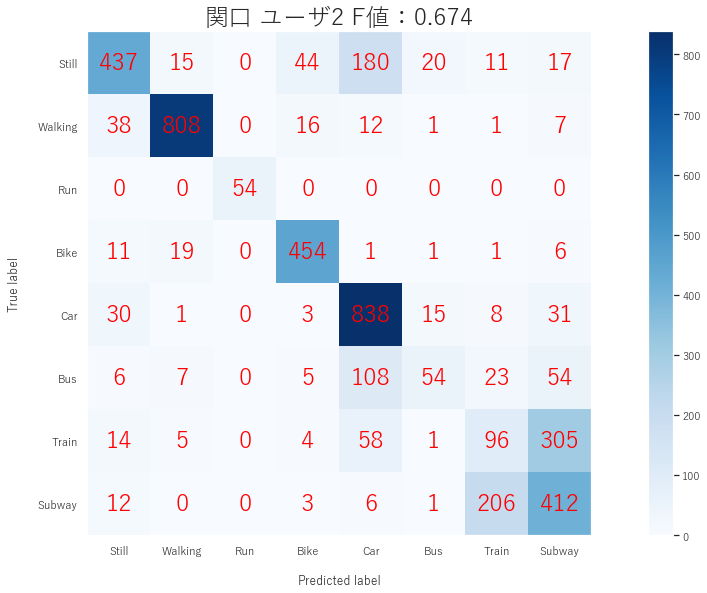

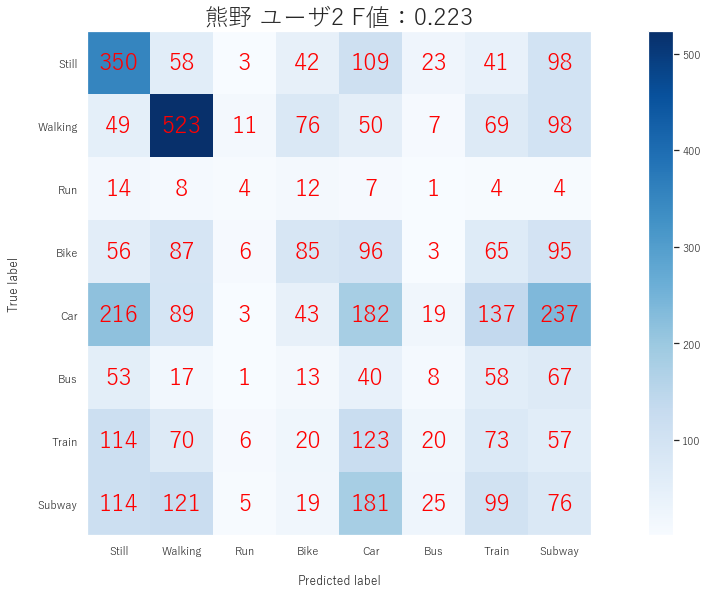

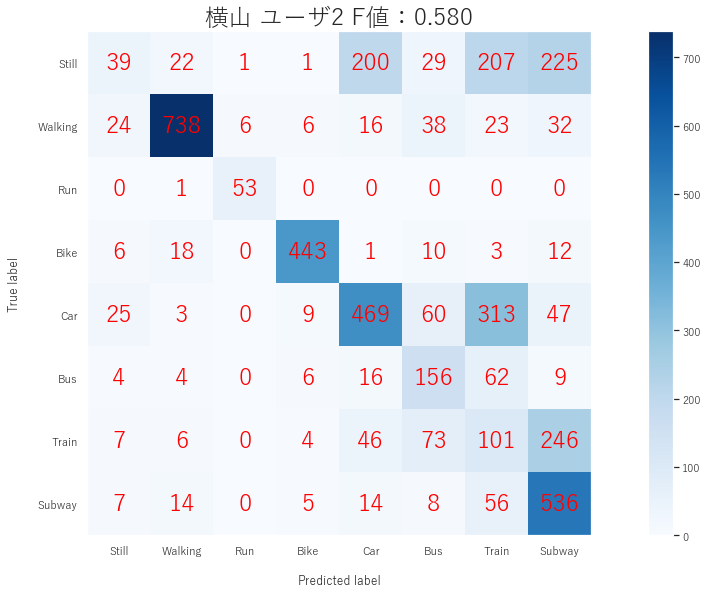

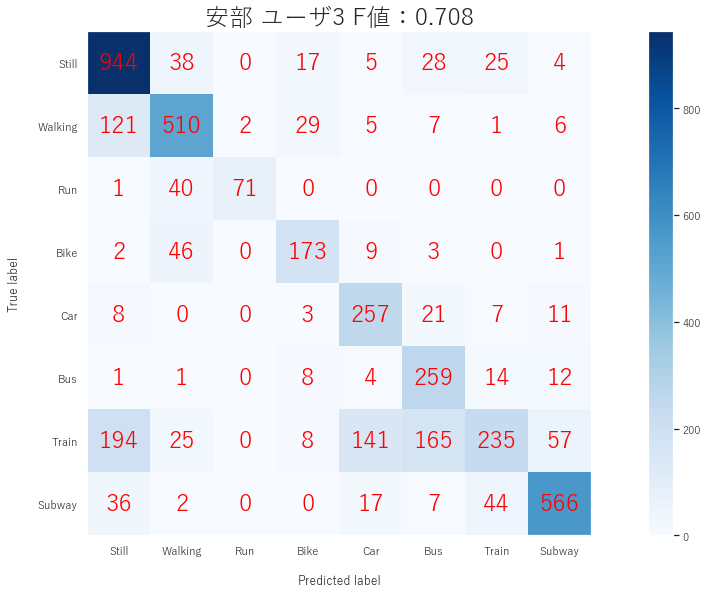

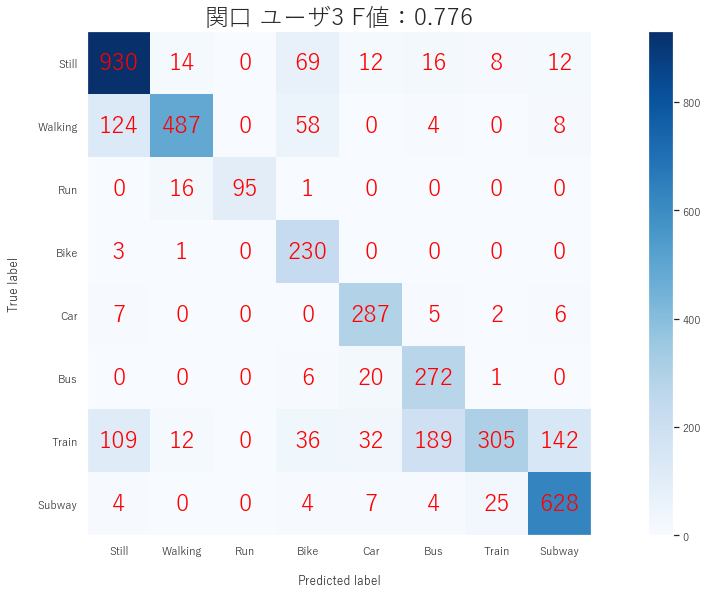

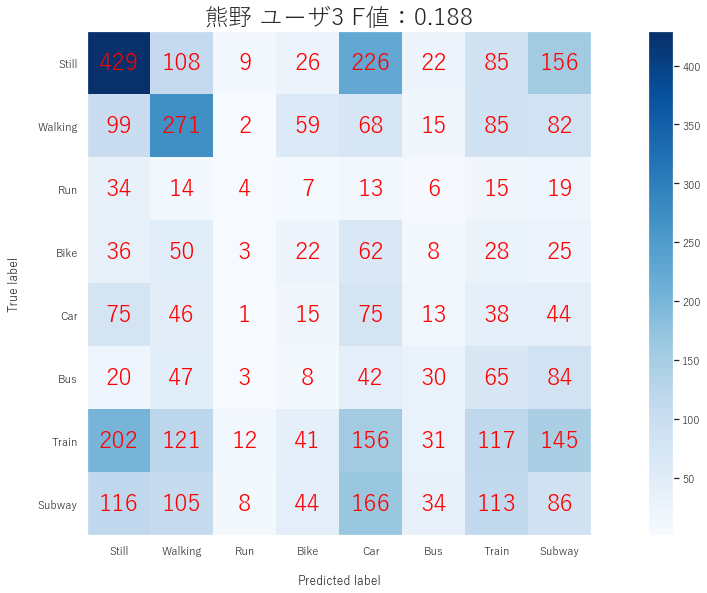

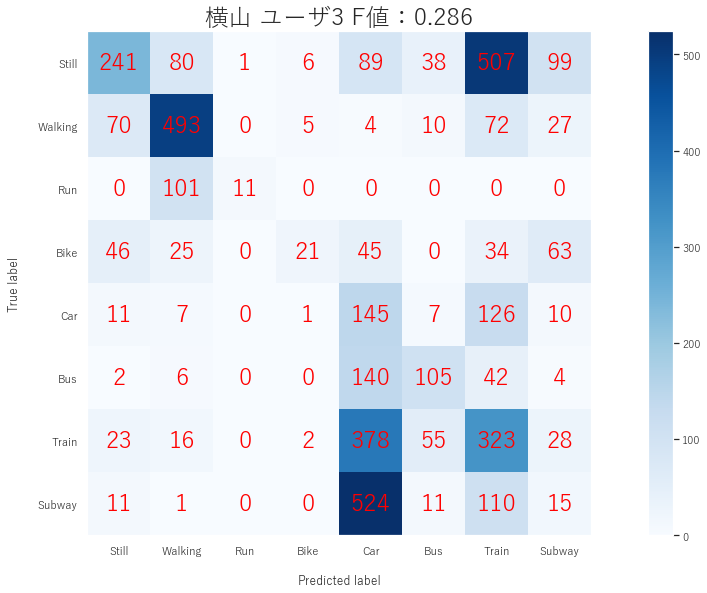

In [8]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

for i in range(2, 4):
    for pattern, name in zip(patterns, names):
        plot_confusion_matrix(pattern[(pattern['pattern'] == 2) & (pattern['user'] == i)]['label'], pattern[(pattern['pattern'] == 2) & (pattern['user'] == i)][name + "predict"], class_names, normalize=False, fontsize=24)
        plt.grid(False)
        f1 = f1_score(pattern[(pattern['pattern'] == 2) & (pattern['user'] == i)]['label'], pattern[(pattern['pattern'] == 2) & (pattern['user'] == i)][name + "predict"], average="macro")
        plt.title(name + " ユーザ" + str(i) + " F値：" + "{0:.3f}".format(f1), fontsize=24)
        print(name, f1)

# 保持位置ごと成績をチェック

In [ ]:
# names = ["安部", "関口", "横山", "熊野"]
# names = ["安部", "関口", "熊野"]
names = ["安部", "関口"]
patterns = []

for name in names:
    patterns.append(pattern2Concat("validation", "Hips", name))


In [ ]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

for pattern, name in zip(patterns, names):
    plot_confusion_matrix(pattern[pattern['pattern'] == 2]['label'], pattern[pattern['pattern'] == 2][name + "predict"], class_names, normalize=False, fontsize=24)
    plt.grid(False)

    f1 = f1_score(pattern[pattern['pattern'] == 2]['label'], pattern[pattern['pattern'] == 2][name + "predict"], average="macro")
    print(name, f1)

# かんたんにロジスティック回帰で分類

In [9]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# パターン2の学習して良いデータの読み込み
## pattern == 1のやつってこと

In [26]:
def logisticX_pattern2(kind, names):
    x = []
#     hold_positions = ["Bag", "Hips", "Torso", "Hand"]
    hold_positions = ["Hips"]
    pattern_file = np.load("validation_pattern2.npy").reshape([-1])
        
    for hold_position in hold_positions:
        file_path = rename(kind, hold_position, names[0])
        xx = np.load(file_path).reshape([-1, 8])
        if (names[0] == "安部" or names[0] == "横山" or names[0] == "安部1") and kind == "train":
            xx = np.delete(xx, 120845, 0)
        if kind == "validation":
            xx = xx[pattern_file == 1]
        for name in names[1:]:
            file_path = rename(kind, hold_position, name)
            tmp = np.load(file_path).reshape([-1, 8])
            if (name == "安部" or name == "横山" or name == "安部1") and kind == "train":
                tmp = np.delete(tmp, 120845, 0)
            if kind == "validation":
                tmp = tmp[pattern_file == 1]
            xx = np.concatenate([xx, tmp], axis=1)
            print(xx.shape)
        x.append(xx)
            
    x = np.array(x)
    x = x.reshape([-1, 8])
    return x

In [27]:
pattern_file = np.load("validation_pattern2.npy").reshape([-1])

x_train = logisticX_pattern2("train", names)
x_train = np.concatenate([x_train, logisticX_pattern2("validation", names)], axis=0)

y_train_tmp = np.delete(np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1]), 120845, 0)
y_train = np.concatenate([y_train_tmp], axis=0)
y_train_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_train_tmp = y_train_tmp[pattern_file == 1]
y_train = np.concatenate([y_train, y_train_tmp], axis=0)
y_train = y_train.reshape([-1, 1])

x_train = x_train.reshape([-1, 8 * len(names)])
x_train.shape, y_train.shape

(195490, 16)
(195490, 24)
(195490, 32)
(14338, 16)
(14338, 24)
(14338, 32)


((209828, 32), (209828, 1))

## ロジスティック回帰で学習

In [28]:
lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(x_train, y_train) # ロジスティック回帰モデルの重みを学習


C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## XGBoostで学習

In [12]:
evals_result = {}
model = xgb.XGBClassifier(n_estimators=25, n_jobs=-1, tree_method='gpu_hist', gpu_id=0)
model.fit(x_train, y_train, eval_set=[(x_train, y_train)], eval_metric='merror', verbose=False, callbacks=[xgb.callback.record_evaluation(evals_result)])

C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=25, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='gpu_hist', validate_parameters=False,
              verbosity=None)

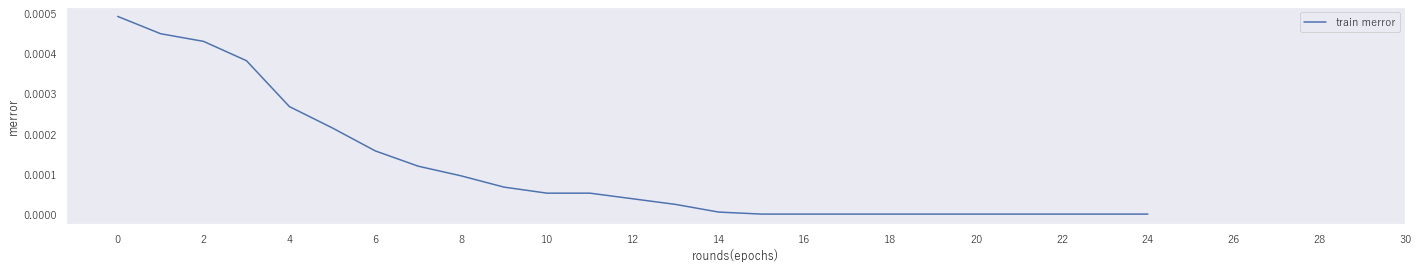

In [13]:
# 学習過程の名前は 'validation_{n}' になる
plt.figure(figsize=(24, 4))
train_metric = evals_result['validation_0']['merror']
plt.plot(train_metric, label='train merror')
# eval_metric = evals_result['validation_1']['merror']
# plt.plot(eval_metric, label='eval merror')
plt.grid()
plt.legend()
plt.xlabel('rounds(epochs)')
plt.ylabel('merror')
plt.xticks(np.arange(0, 30+1, 2))
# plt.ylim(-0.0005, 0.005)
plt.show()

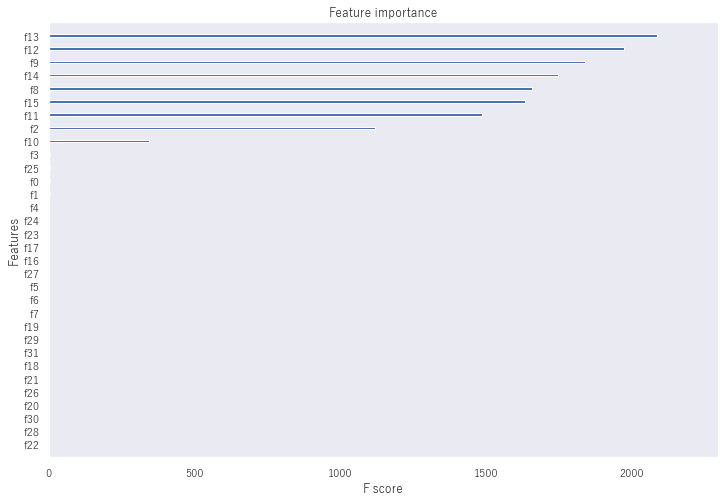

In [14]:
_, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(model,
                    ax=ax,
                    importance_type='gain',
                    show_values=False)
plt.grid(False)

In [29]:
def logisticTest_pattern2(kind, names):
    x = []
#     hold_positions = ["Bag", "Hips", "Torso", "Hand"]
    hold_positions = ["Hips"]
    pattern_file = np.load("validation_pattern2.npy").reshape([-1])
        
    for hold_position in hold_positions:
        file_path = rename(kind, hold_position, names[0])
        xx = np.load(file_path).reshape([-1, 8])
        if (names[0] == "安部" or names[0] == "横山" or names[0] == "安部1") and kind == "train":
            xx = np.delete(xx, 120845, 0)
        if kind == "validation":
            xx = xx[pattern_file == 2]
        for name in names[1:]:
            file_path = rename(kind, hold_position, name)
            tmp = np.load(file_path).reshape([-1, 8])
            if (name == "安部" or name == "横山" or name == "安部1") and kind == "train":
                tmp = np.delete(tmp, 120845, 0)
            if kind == "validation":
                tmp = tmp[pattern_file == 2]
            xx = np.concatenate([xx, tmp], axis=1)
            print(xx.shape)
        x.append(xx)
            
    x = np.array(x)
    x = x.reshape([-1, 8])
    
    # ユーザ番号も入れとく
    user_label = [2] * 14813 + [3] * 13872
    user_label = np.array(user_label).reshape([-1, 1])
    user_label = user_label[pattern_file == 2]
    return x, user_label

In [30]:
x_test, user_label = logisticTest_pattern2("validation", names)
y_test_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_test_tmp = y_test_tmp[pattern_file == 2]
y_test = np.concatenate([y_test_tmp], axis=0)
y_test = y_test.reshape([-1, 1])
y_test = np.concatenate([y_test, user_label], axis=1)
x_test = x_test.reshape([-1, 8 * len(names)])

x_test.shape, y_test.shape

(8651, 16)
(8651, 24)
(8651, 32)


((8651, 32), (8651, 2))

In [31]:
predict = lr.predict(x_test)
print(predict)

[3. 3. 3. ... 2. 2. 1.]


In [18]:
predict = model.predict(x_test)
print(predict)

[3. 3. 3. ... 4. 4. 1.]


In [32]:
def plot_confusion_matrix(test_y,pred_y,class_names,normalize=False, fontsize=32):
    cm = (confusion_matrix(test_y,pred_y))
    # classes = class_names[unique_labels(test_y,pred_y)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
    
    if len(class_names) <= 3:
        fig, ax = plt.subplots(figsize=(8, 4))
    else:
        fig, ax = plt.subplots(figsize=(16, 8))

    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           ylabel='True label\n',
           xlabel='\nPredicted label')
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,
                    i,
                    format(cm[i, j] * 100, fmt),
                    ha="center",
                    va="center",
                    color="red", fontsize=fontsize)
    fig.tight_layout()
    return ax

In [33]:
np.where(predict >= 0.75)[0].shape, predict.shape

((8651,), (8651,))

In [34]:
np.unique(np.argmax(predict[np.where(predict >= 0.75)])) + 1

array([115], dtype=int64)

In [35]:
np.unique(y_test[np.where(predict >= 0.75)[0]])

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [23]:
plot_confusion_matrix(y_test[np.where(predict >= 0.75)[0], 0] - 1, np.argmax(predict[np.where(predict >= 0.75)[0]], axis=1), class_names, normalize=False, fontsize=24)
plt.grid(False)

f1 = f1_score(y_test[np.where(predict >= 0.75)[0], 0] - 1, np.argmax(predict[np.where(predict >= 0.75)[0]], axis=1), average="macro")
print(predict.shape)
print(np.where(predict >= 0.75)[0].shape)
print("アンサンブル結果", f1)

AxisError: axis 1 is out of bounds for array of dimension 1

## ユーザごとにアンサンブル結果出す

Hips_アンサンブル結果 0.6865656786162866
Hips_アンサンブル結果 0.7789086821268505


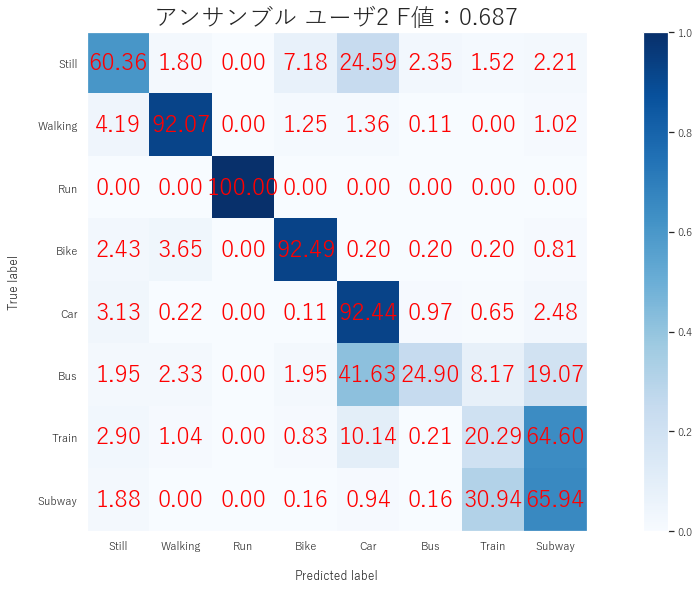

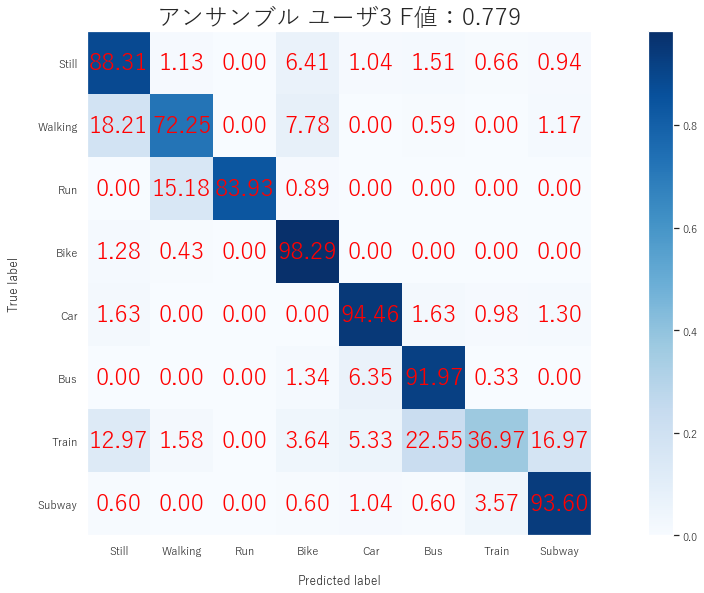

In [36]:
# hold_positions = ["Bag", "Hips", "Torso", "Hand"]
hold_positions = ["Hips"]
for j in range(2, 4):
    for i in range(len(hold_positions)):
        plot_confusion_matrix(y_test[y_test[:, 1] == j][y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1), 0], predict[y_test[:, 1] == j][y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], \
                              class_names, normalize=True, fontsize=24)
        plt.grid(False)

        f1 = f1_score(y_test[y_test[:, 1] == j][y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1), 0], predict[y_test[:, 1] == j][y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], average="macro")
        print(hold_positions[i] + "_アンサンブル結果", f1)
        plt.title("アンサンブル ユーザ" + str(j) + " F値：" + "{0:.3f}".format(f1), fontsize=24)

Hips_アンサンブル結果 0.7465963397946962


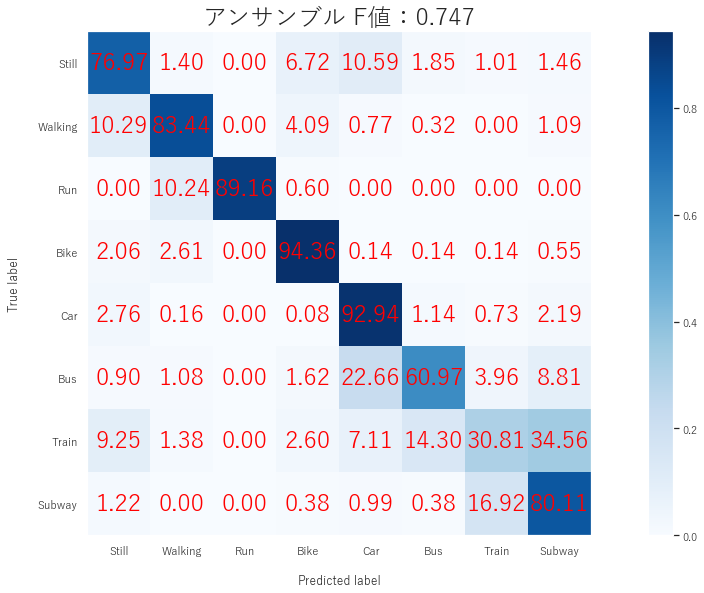

In [37]:
# hold_positions = ["Bag", "Hips", "Torso", "Hand"]
hold_positions = ["Hips"]
for i in range(len(hold_positions)):
    plot_confusion_matrix(y_test[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1), 0], predict[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], class_names, normalize=True, fontsize=24)
    plt.grid(False)

    f1 = f1_score(y_test[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1), 0], predict[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], average="macro")
    print(hold_positions[i] + "_アンサンブル結果", f1)
    plt.title("アンサンブル F値：" + "{0:.3f}".format(f1), fontsize=24)

In [ ]:
y_test.shape, predict.shape

In [ ]:
# cm = confusion_matrix(y_test, pre)
plt.subplots(8, 8, figsize=(24, 16))
k = 0
for i in range(8):
    for j in range(8):
        predict[(y_test[:, 0] == i) & (np.argmax(predict, axis=1) == j)]
        plt.subplot(8, 8, k+1)
        plt.hist(predict[(y_test[:, 0] == (i+1)) & (np.argmax(predict, axis=1) == j)][:, j])
        plt.xlim(0, 1.0)
        k += 1

In [ ]:
def logisticTest_pattern2(kind, names):
    file_path = rename(kind, "", names[0])
    x = np.load(file_path)
    print(x.shape)
    for name in names[1:]:
        file_path = rename(kind, "", name)
        x = np.concatenate([x, np.load(file_path)], axis=1)
        print(x.shape)
    return x

In [ ]:
x_test = logisticTest_pattern2("test", names)
x_test = x_test.reshape([-1, 8 * len(names)])

x_test.shape

In [ ]:
predict = lr.predict(x_test)
print(predict, np.unique(predict))

In [ ]:
plt.figure(figsize=(32, 8))
plt.plot(predict[:50], 'r', marker='o', linestyle='None')
plt.plot(np.argmax(x_test[:50, :8], axis=1) + 1, 'g', marker='o', linestyle='None', alpha=0.5)
plt.yticks(np.arange(1, 9), ['Still', "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"], fontsize=16)
plt.ylim(8.5, 0.5)

In [ ]:
labels = []
for i in range(8):
    labels.append(np.sum(predict == (i+1)))

In [ ]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

fig, ax = plt.subplots(figsize=(16, 8))
rect = plt.bar(class_names, np.array(labels))
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=16)
autolabel(rect)
plt.grid(False)
plt.title("test data predict", fontsize=24)
plt.show()

In [ ]:
predict = lr.predict_proba(x_test)
predict.shape

In [ ]:
np.mean(np.max(predict, axis=1))

In [ ]:
labels = []
for i in range(8):
    labels.append(len(np.where(predict[:, i] >= 0.90)[0]))
    print(len(np.where(predict[:, i] >= 0.90)[0]))

In [ ]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

fig, ax = plt.subplots(figsize=(16, 8))
rect = plt.bar(class_names, np.array(labels))
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=16)
autolabel(rect)
plt.grid(False)
plt.title("test data predict >= 0.90", fontsize=24)
plt.show()

## まずは、3人の出力確率をDeep Learningで学習

In [ ]:
import numpy as np
import os
import random
import scipy
from scipy import signal
from numpy.fft import fft
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import he_normal
from tensorflow.python.keras.utils.vis_utils import plot_model

from sklearn.model_selection import train_test_split

import pandas as pd
import pickle

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
pattern_file = np.load("validation_pattern2.npy").reshape([-1])
names = ["安部", "熊野", "横山"]

x_train = logisticX_pattern2("train", names)
x_train = np.concatenate([x_train, logisticX_pattern2("validation", names)], axis=0)

y_train_tmp = np.delete(np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1]), 120845, 0)
y_train = np.concatenate([y_train_tmp], axis=0)
y_train_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_train_tmp = y_train_tmp[pattern_file == 1]
y_train = np.concatenate([y_train, y_train_tmp], axis=0)
y_train = y_train.reshape([-1, 1])

x_train = x_train.reshape([-1, 8 * len(names)])
x_train.shape, y_train.shape

In [ ]:
x_train = (x_train - x_train.mean(axis=0, keepdims=True)) / x_train.std(axis=0, keepdims=True)
x_train.mean(), x_train.std()

In [ ]:
x_train = np.round(x_train, 5)
x_train.shape

In [ ]:
y_train -= 1
np.unique(y_train)

In [ ]:
lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(x_train, y_train) # ロジスティック回帰モデルの重みを学習


In [ ]:
names = ["安部", "熊野", "横山"]
x_test = logisticTest_pattern2("validation", names)
y_test_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_test_tmp = y_test_tmp[pattern_file == 2]
y_test = np.concatenate([y_test_tmp], axis=0)
y_test = y_test.reshape([-1, 1])
x_test = x_test.reshape([-1, 8 * len(names)])

x_test.shape, y_test.shape

In [ ]:
train_predict = model.predict_proba(x_train)
predict = model.predict_proba(x_test)

train_predict.shape, predict.shape

In [ ]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]
plot_confusion_matrix(y_test-1, np.argmax(predict, axis=1), class_names, normalize=False, fontsize=24)
plt.grid(False)

f1 = f1_score(y_test-1, np.argmax(predict, axis=1), average="macro")
print(predict.shape)
print("アンサンブル結果", f1)

In [ ]:
pattern_file = np.load("validation_pattern2.npy").reshape([-1])
names = ["関口"]

x_train = logisticX_pattern2("train", names)
x_train = np.concatenate([x_train, logisticX_pattern2("validation", names)], axis=0)

y_train_tmp = np.delete(np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1]), 120845, 0)
y_train = np.concatenate([y_train_tmp], axis=0)
y_train_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_train_tmp = y_train_tmp[pattern_file == 1]
y_train = np.concatenate([y_train, y_train_tmp], axis=0)
y_train = y_train.reshape([-1, 1])

x_train = x_train.reshape([-1, 8 * len(names)])
x_train.shape, y_train.shape

In [ ]:
x_train = np.concatenate([x_train, train_predict], axis=1)
x_train.shape

In [ ]:
lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(x_train, y_train) # ロジスティック回帰モデルの重みを学習


In [ ]:
names = ["関口"]
x_test = logisticTest_pattern2("validation", names)
y_test_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_test_tmp = y_test_tmp[pattern_file == 2]
y_test = np.concatenate([y_test_tmp], axis=0)
y_test = y_test.reshape([-1, 1])
x_test = x_test.reshape([-1, 8 * len(names)])

x_test.shape, y_test.shape

In [ ]:
x_test = np.concatenate([x_test, predict], axis=1)
x_test.shape

In [ ]:
predict = lr.predict(x_test)
print(predict)

In [ ]:
plot_confusion_matrix(y_test, predict, class_names, normalize=False, fontsize=24)
plt.grid(False)

f1 = f1_score(y_test, predict, average="macro")
print(predict.shape)
print("アンサンブル結果", f1)

In [ ]:
# hold_positions = ["Bag", "Hips", "Torso", "Hand"]
hold_positions = ["Hips"]
for i in range(len(hold_positions)):
    plot_confusion_matrix(y_test[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], predict[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], class_names, normalize=False, fontsize=24)
    plt.title(hold_positions[i])
    plt.grid(False)

    f1 = f1_score(y_test[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], predict[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], average="macro")
    print(hold_positions[i] + "_アンサンブル結果", f1)